# Simple Linear Regression - Gradient Descent

In [59]:
%matplotlib inline

# imports
from numpy import *
import matplotlib.pyplot as plt

#### Import the data
Here, we're using a dataset with two features representing how cool Toms are across the world are based on how many backgrounds effects they used.

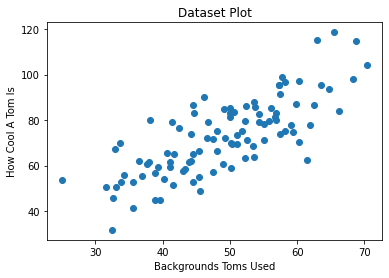

In [60]:
# get data from CSV (dataset)
points = genfromtxt('data.csv', delimiter=',')

# extract columns (select features)
x = array(points[:,0])
y = array(points[:,1])

# plot the dataset
plt.scatter(x,y)
plt.xlabel('Backgrounds Toms Used')
plt.ylabel('How Cool A Tom Is')
plt.title('Dataset Plot')
plt.show()

#### Defining the hyperparamters.
Hyperparamters lets us control speed and complexity 

In [61]:
# hyperparamters
learning_rate = 0.000001 # step closer to better b and m values
# y = mx + b
initial_b = 0 # starting y intercept
initial_m = 0 # starting slope value
num_iterations = 1000 # number of iternations to improve

#### Define cost function

In [62]:
# Sum of squares: it is a measure of the discrepancy between the data and an estimation model
# https://en.wikipedia.org/wiki/Residual_sum_of_squares
def compute_cost(b, m, points):
    total_cost = 0
    N = float(len(points))
    
    # compute sum of squared errors
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    # return average of squared error
    return total_cost/N

#### Define Gradient Descent functions

In [63]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    cost_graph = []

    # for every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, points))
        b, m = step_gradient(b, m, array(points), learning_rate)

    return [b, m, cost_graph]

def step_gradient(b_current, m_current, points, learning_rate):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))

    # calculate Gradient
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # update current m and b
    m_updated = m_current - learning_rate * m_gradient
    b_updated = b_current - learning_rate * b_gradient

    # return updated parameters
    return b_updated, m_updated

#### Run gradient_descent_runner() to get optimized parameters b and m

In [64]:
b, m, cost_graph = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)

# print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

# print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, points))

Optimized b: 0.029472081221699396
Optimized m: 1.4689072254569766
Minimized cost: 112.89968139674588


#### Plotting the cost per iterations

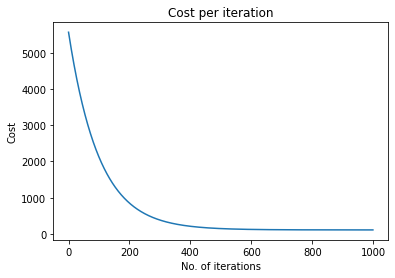

In [65]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

#### Plot line of best fit

Gradient descent converges to local minimum after 5 iterations

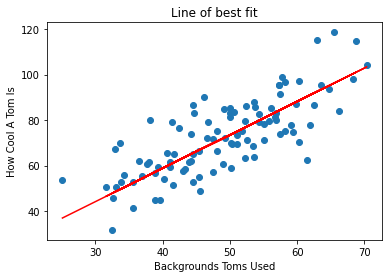

In [66]:
# plot dataset
plt.scatter(x, y)
# predict y values
pred = m * x + b
# plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Backgrounds Toms Used')
plt.ylabel('How Cool A Tom Is')
plt.title('Line of best fit')
plt.show()